1. Use numpy para criar uma matriz (dataset) composta por valores numéricos aleatórios com 200 linhas (instâncias) e 12 colunas (características). Apresente o dataset.


In [28]:
import numpy as np

In [29]:
dataset = np.random.randint(low = 0, high = 500, size=(200, 12))

print(dataset)

[[455 355 209 ... 293 254 419]
 [135 466 362 ... 361  19 433]
 [442  18 250 ... 162 431 486]
 ...
 [166 303 212 ...  57 107 468]
 [463 481 129 ...  71 269 195]
 [221 270 247 ... 357 357 433]]


2. Converta o dataset do exercício 1 em um dataframe de pandas. As instâncias devem ser numeradas de 0 a 199 e as características nomeadas com letras de "a" a "l" (inclua "k" como coluna). Apresente o dataset no formato dataframe.


In [30]:
import pandas as pd

dataframe = pd.DataFrame(dataset, columns = [chr(i) for i in range(ord('a'), ord('l') + 1)])

dataframe.head()

,a,b,c,d,e,f,g,h,i,j,k,l
0,455,355,209,150,124,335,393,418,341,293,254,419
1,135,466,362,18,400,89,187,213,66,361,19,433
2,442,18,250,306,406,162,161,57,155,162,431,486
3,120,210,148,390,294,267,205,255,94,472,239,306
4,97,356,193,453,131,108,441,282,283,53,183,350


3. Mostre apenas as instâncias ímpares e as características "b", "e", "f" do dataset criado no exercício 2 ordenados crescentemente pelos valores da característica "f".


In [31]:
odd_dataframe = (
    dataframe.filter(["b", "e", "f"])
    .filter(range(1, len(dataframe), 2), axis="index")
    .sort_values("f")
)

display(odd_dataframe)

,b,e,f
75,175,391,8
5,138,85,15
57,171,31,20
97,319,336,28
109,259,160,31
...,...,...,...
93,406,365,482
131,439,307,486
83,271,453,488
135,10,85,490


4. Apresente a soma dos valores, os valores mínimos e máximos, a média e o desvio padrão de cada coluna do dataset do exercício 3. Apresente também o intervalo de confiança de cada característica.


In [34]:
from scipy import stats


def custom_describe(data: pd.DataFrame):
    # Finding the critical value
    std_dev = data.std()
    mean = data.mean()
    confidence_interval_low, confidence_interval_high = stats.norm.interval(
        0.95, loc=mean, scale=std_dev / np.sqrt(len(data))
    )

    summary = {
        "sum": data.sum(),
        "mean": mean,
        "std": std_dev,
        "min": data.min(),
        "max": data.max(),
        "confidence interval low": confidence_interval_low,
        "confidence interval high": confidence_interval_high,
    }

    # Creating a resulting DataFrame with the stats, just for displaying
    df_summary = pd.DataFrame(summary)

    return df_summary


display(custom_describe(odd_dataframe))

,sum,mean,std,min,max,confidence interval low,confidence interval high
b,23872,238.72,142.863577,5,495,210.719253,266.720747
e,25510,255.10,140.169630,7,494,227.627257,282.572743
f,25602,256.02,153.005313,8,496,226.031510,286.008490


5. Faça um gráfico de caixas com dados de cada característica (coluna) do dataframe do exercício 2.


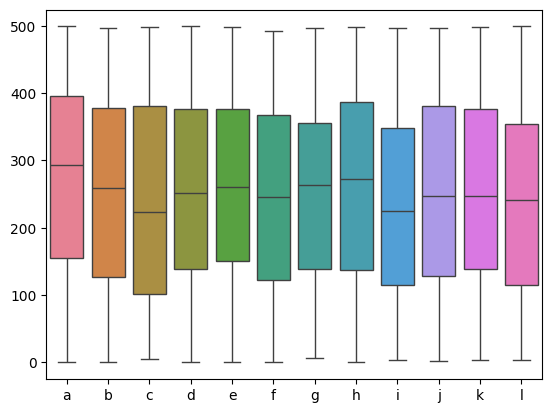

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(dataframe)
plt.show()

6. Obtenha média, desvio padrão e intervalo de confiança de cada característica da base iris. Contraste os resultados com os obtidos fazendo um gráfico de barras com intervalo de confiança.


,sum,mean,std,min,max,confidence interval_low,confidence interval_high
sepal_length,876.5,5.843333,0.828066,4.3,7.9,4.485305,7.201362
sepal_width,458.6,3.057333,0.435866,2.0,4.4,2.342513,3.772154
petal_length,563.7,3.758000,1.765298,1.0,6.9,0.862911,6.653089
petal_width,179.9,1.199333,0.762238,0.1,2.5,-0.050736,2.449403


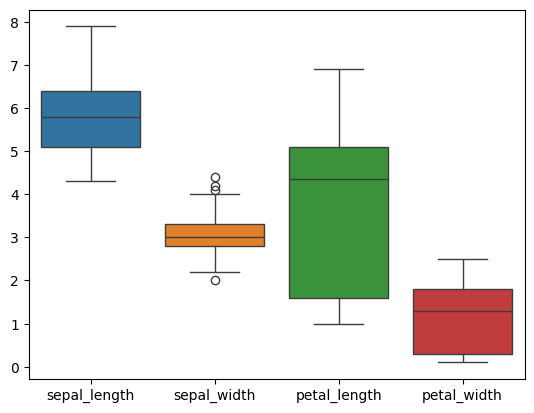

In [ ]:
# Load the Iris dataset
iris = sns.load_dataset('iris').drop(columns='species')

display(custom_describe(iris))

sns.boxplot(iris)
plt.show()

7. Faça um histograma com 7 faixas equidistantes de valores para a característica sepal_width da base iris.


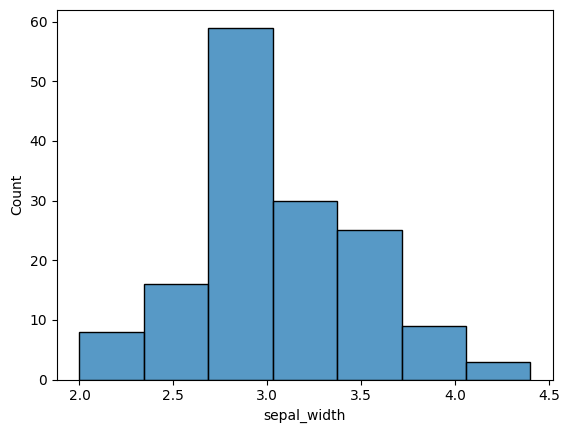

In [ ]:
sns.histplot(iris["sepal_width"], bins=7)
plt.show()

8. Faça um gráfico de dispersão apresentando os dados das caraterísticas sepal_length e sepal_width diferenciando os exemplos de cada classe.


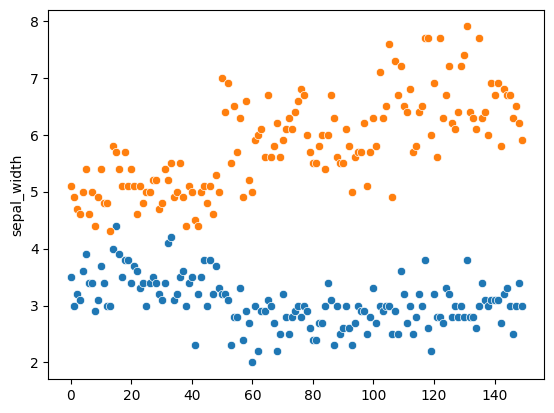

In [ ]:
sns.scatterplot(iris["sepal_width"])
sns.scatterplot(iris["sepal_length"])
plt.show()

9. Apresente um gráfico com a projeção TSNE criado no exercício 1.

(200, 12)
(200, 2)


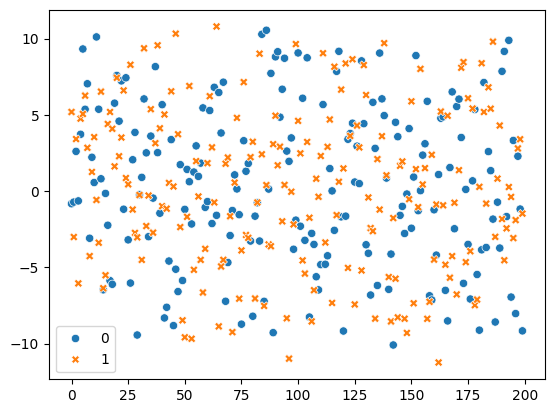

In [ ]:
from sklearn.manifold import TSNE

print(dataset.shape)

tsne = TSNE(2)
tsne_dataset = tsne.fit_transform(dataset)

print(tsne_dataset.shape)

sns.scatterplot(tsne_dataset)
plt.show()